# Interpretable Recurrent Neural Network Video MNIST Demo

Dataset courtesty of github user [despoisj](https://github.com/despoisj) and his/her [LatentSpaceVisualization]( https://github.com/despoisj/LatentSpaceVisualization) project.

---

# Load Data and Visualize

4


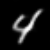

4


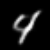

4


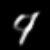

In [1]:
from IPython.display import display
import pickle
import pandas

[imgs, y] = pandas.read_pickle(open('LatentSpaceVisualization/Visuals/mnist_transitions.p', 'rb'))
for img, y_ in zip(imgs[:3], y[:3]):
    print(y_)
    display(img)

# Interactive Visualization

In [2]:
from ipywidgets import interact, fixed
import ipywidgets as widgets

# this decorator casts the images into a slider widget - super useful from time to time
@interact(imgs=fixed(imgs), y=fixed(y), i=widgets.IntSlider(min=0, max=len(y)-1, step=1))
def mnist_video(imgs, y, i):
    print(y[i])
    return imgs[i].resize(size=[128, 128])

# Vectorize Data Points

In [3]:
from keras.preprocessing.image import img_to_array
import numpy as np

X = np.array([img_to_array(img) for img in imgs]) / 255.
#X

Using TensorFlow backend.


# Split up Into Subsequences

In [4]:
X_list = np.split(X, indices_or_sections=100)
#X_list

# Make into Sequential

In [5]:
X_seq = np.zeros([100, 60, 50, 50, 1])
for i, x in enumerate(X_list):
    X_seq[i] = x

# Define Keras Model

In [6]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, TimeDistributed, Conv2D, MaxPooling2D, Flatten

model = Sequential()

model.add(TimeDistributed(Conv2D(32, kernel_size=(3, 3), activation='relu'), input_shape=[60, 50, 50, 1]))
model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2))))
model.add(TimeDistributed(Flatten()))
model.add(SimpleRNN(units=10, return_sequences=True, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_1 (TimeDist (None, 60, 48, 48, 32)    320       
_________________________________________________________________
time_distributed_2 (TimeDist (None, 60, 24, 24, 32)    0         
_________________________________________________________________
time_distributed_3 (TimeDist (None, 60, 18432)         0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 60, 10)            184430    
Total params: 184,750
Trainable params: 184,750
Non-trainable params: 0
_________________________________________________________________


# Prediction

In [7]:
model.predict(X_seq[:1]).shape

(1, 60, 10)

# Preprocessing Labels

In [8]:
from keras.utils.np_utils import to_categorical

Y = to_categorical(y)
Y_list = np.split(Y, indices_or_sections=100)
Y_list

Y_seq = np.zeros([100, 60, 10])
for i, y_ in enumerate(Y_list):
    Y_seq[i] = y_

# Define Callback

In [10]:
from keras.callbacks import Callback

class HelloWorld(Callback):
    def on_train_begin(self, logs=None):
        print('Training has begun')

    def on_epoch_end(self, epoch, logs=None):
        print('Epoch ended')

# Fit the Model

In [16]:
history = model.fit(X_seq[:100], Y_seq[:100], validation_split=.2, callbacks=[HelloWorld()])

Train on 80 samples, validate on 20 samples
Training has begun
Epoch 1/10
80/80 [==============================] - 3s - loss: 0.7625 - acc: 0.7412 - val_loss: 0.9441 - val_acc: 0.6950
Epoch 2/10
80/80 [==============================] - 3s - loss: 0.7426 - acc: 0.7517 - val_loss: 0.9217 - val_acc: 0.7067
Epoch 3/10
80/80 [==============================] - 3s - loss: 0.7229 - acc: 0.7567 - val_loss: 0.9055 - val_acc: 0.7150
Epoch 4/10
80/80 [==============================] - 4s - loss: 0.7042 - acc: 0.7617 - val_loss: 0.9067 - val_acc: 0.7092
Epoch 5/10
80/80 [==============================] - 3s - loss: 0.6840 - acc: 0.7731 - val_loss: 0.9104 - val_acc: 0.7058
Epoch 6/10
80/80 [==============================] - 3s - loss: 0.6714 - acc: 0.7804 - val_loss: 0.9045 - val_acc: 0.7067
Epoch 7/10
80/80 [==============================] - 3s - loss: 0.6587 - acc: 0.7850 - val_loss: 0.8935 - val_acc: 0.7183
Epoch 8/10
80/80 [==============================] - 3s - loss: 0.6443 - acc: 0.7881 - val_

# Learning Curves

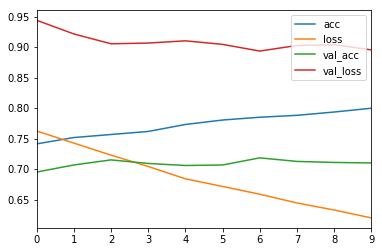

In [17]:
import pandas as pd
%matplotlib inline

pd.DataFrame(history.history).plot()

In [18]:
model.evaluate(X_seq, Y_seq)

100/100 [==============================] - 1s     


[0.66791848659515385, 0.7844999837875366]